In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
from datetime import timedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from time import time

In [2]:
df=pd.read_csv('ice_cream.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       577 non-null    object 
 1   IPN31152N  577 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


In [3]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [4]:
production_ice_cream=pd.read_csv('ice_cream.csv',parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)

In [5]:
production_ice_cream.rename('production',inplace=True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 577, dtype: float64

In [6]:
production_ice_cream = production_ice_cream.asfreq(pd.infer_freq(production_ice_cream.index))

In [7]:
production_ice_cream

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Freq: MS, Name: production, Length: 577, dtype: float64

In [8]:
start_date=pd.to_datetime('2010-01-01')
production_ice_cream=production_ice_cream[start_date:]

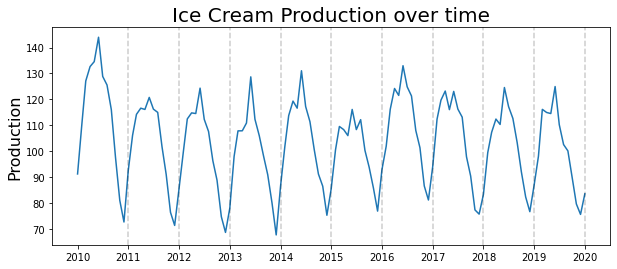

In [9]:
plt.figure(figsize=(10,4))
plt.plot(production_ice_cream)
plt.title('Ice Cream Production over time',fontsize=20)
plt.ylabel('Production',fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)

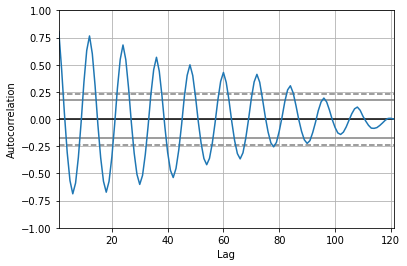

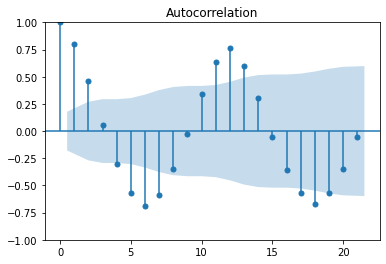

In [10]:
nifty_q=production_ice_cream
t=autocorrelation_plot(nifty_q)
pyplot.show(),
plot_acf(production_ice_cream)
plt.show()

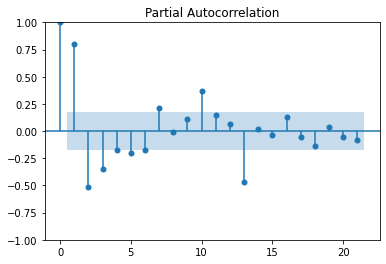

In [11]:
pacf_plot=plot_pacf(production_ice_cream,method='ywm')

In [12]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)
train_data = production_ice_cream[:train_end]
test_data = production_ice_cream[train_end+timedelta(days=1):test_end]

In [13]:
model = ARIMA(train_data, order=(14,1,0))#ARIMA(p=AR lags,d=Seasonal differencing to make stationary t-t1-first order,t1-t2 second,q=MA lags)

In [14]:
start=time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:',end - start)

Model Fitting Time: 1.171358585357666


C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             production   No. Observations:                  108
Model:                ARIMA(14, 1, 0)   Log Likelihood                -308.994
Date:                Tue, 30 Nov 2021   AIC                            647.988
Time:                        14:34:48   BIC                            688.081
Sample:                    01-01-2010   HQIC                           664.241
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1362      0.122     -1.120      0.263      -0.375       0.102
ar.L2         -0.1287      0.125     -1.031      0.302      -0.373       0.116
ar.L3         -0.2659      0.098     -2.699      0.0

In [16]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [17]:
predictions = model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals = test_data - predictions

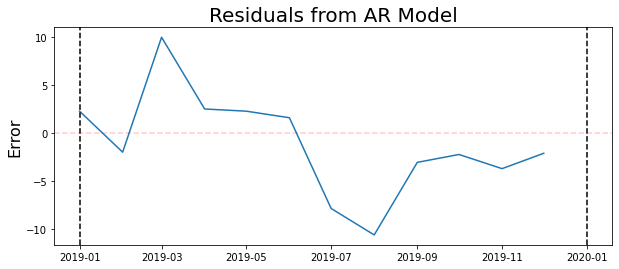

In [18]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model',fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--')

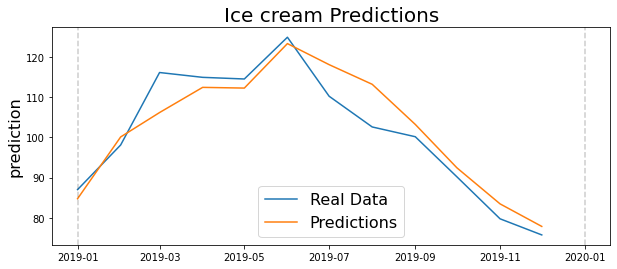

In [19]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Real Data', 'Predictions'), fontsize=16)

plt.title('Ice cream Predictions', fontsize=20)
plt.ylabel('prediction', fontsize=16)
for year in range (2019,2021):
     plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle="--",alpha=0.2)

In [20]:
print("Mean Absolute Percent Error:",round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.041


In [21]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 5.245544525330386
